<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de países

Crear un modelo de segmentación para la clasificación de paises por categoría (desarrollado, en desarrollo, subdesarollado) según sus datos a nivel macro<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
if os.access('Country-data.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv > Country-data.csv
    else:
        !wget Country-data.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv

--2024-03-21 15:54:56--  http://country-data.csv/
Resolving country-data.csv (country-data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘country-data.csv’
--2024-03-21 15:54:56--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9229 (9.0K) [text/plain]
Saving to: ‘Country-data.csv’

Country-data.csv    100%[===================>]   9.01K  --.-KB/s    in 0s      

2024-03-21 15:54:56 (63.7 MB/s) - ‘Country-data.csv’ saved [9229/9229]

FINISHED --2024-03-21 15:54:56--
Total wall clock time: 0.4s
Downloaded: 1 files, 9.0K in 0s (63.7 MB/s)


### `Country-data.csv`:
El dataset **`Country-data.csv`** contiene datos a nivel macroeconomía, ingresos y poblacional sobre países del mundo para su segmentación.<br>
[Dataset source](Country-data.csvn)
- **country** --> nombre del país
- **child_mort** --> cuantos niños menores a 5 años mueren de cada 1000
- **exports** --> exportación de bienes y servicios per cápita
- **health** --> inversiones en salud per cápita
- **import** --> importación de bienes y servicios per cápita
- **Income** --> ingresos por persona (neto)
- **Inflation** --> inflación anual
- **life_expec** --> Promedio de expectativa de vida
- **total_fer** --> Cuantos niños por pareja hay en promedio
- **gdpp** --> Producto bruto interno per cápita

In [3]:
df = pd.read_csv("Country-data.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
missing_values = df.isnull().sum()
missing_values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
df.shape[0]

167

# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

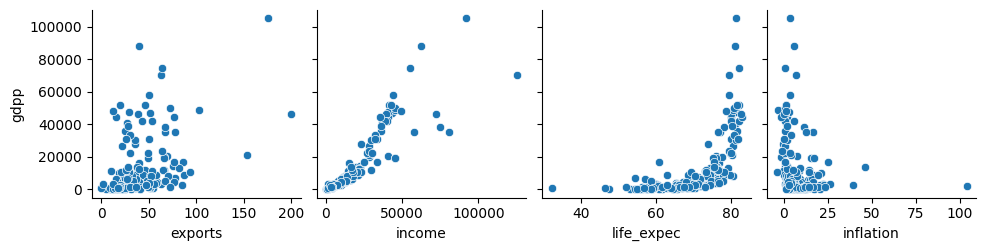

In [9]:
# Observar todas las relaciones entre el feature del producto bruto interno
# y los siguientes features
# Utilizar pairplot con y_vars=['gdpp']
# Utilizar pairplot con x_vars=['exports', 'income', 'life_expec', 'inflation']
# Recordar desactivar la diagonal(diag_kind=None,)
features_to_explore = ['exports', 'income', 'life_expec', 'inflation']

# Pairplot para observar la relación entre GDP y otros features
sns.pairplot(df, y_vars=['gdpp'], x_vars=features_to_explore, diag_kind=None)

Deberían observar que a medida que aumenta el producto bruto interno aumenta la exportación, el ingreso por persona (incoma), la expectativa de vida (life_expec) y baja la inflación (inflation). Este parámetro lo debe utilizar luego para determinar si los paises segmentados son:
- desarrollados
- en_desarrollo
- subdesarrollados

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [13]:
# Almuno: Crear un numpy array "X" con los features de entrada expecto el nombre del pais (country)
X = df.drop(columns=['country']).values





(167, 9)

#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [14]:
# Almuno: Entrenar un modelo de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion
from sklearn.cluster import KMeans

# Definir el rango de clústeres
min_clusters = 2
max_clusters = 10

# Lista para almacenar la inercia de cada modelo
inertia_values = []

# Entrenar un modelo de KMeans para cada número de clúster en el rango especificado
for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Imprimir las inercias para cada número de clúster
for i, inertia in enumerate(inertia_values):
    print(f"Número de clústeres: {i + min_clusters}, Inercia: {inertia}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número de clústeres: 2, Inercia: 36528387934.322105
Número de clústeres: 3, Inercia: 21710210039.754135
Número de clústeres: 4, Inercia: 14610713446.53513
Número de clústeres: 5, Inercia: 10655378083.862543
Número de clústeres: 6, Inercia: 7655725089.094502
Número de clústeres: 7, Inercia: 5353767457.732323
Número de clústeres: 8, Inercia: 4258897193.751583
Número de clústeres: 9, Inercia: 3228565265.6980796
Número de clústeres: 10, Inercia: 2669181672.0337477


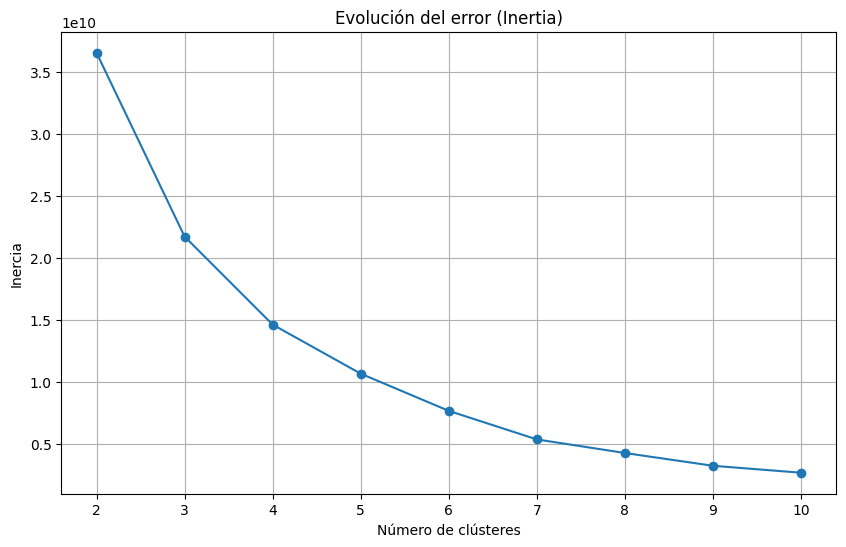

In [15]:
# Dibujar la evolucion del error (inertia) y deteminar el
# punto de quiebre (elbow point)
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.title('Evolución del error (Inertia)')
plt.grid(True)
plt.show()

Se puede observar que el punto de elbow podría ser con cluster=4, pero ya sabemos de ante mano que queremos dividir el dataset en 3 grupos, utilizaremos n_clusters=3

In [17]:
# Alumno: Entrenar el modelo con el mejor n_clusters=3
# y determinar los labels
best_n_clusters = 3

# Entrenar el modelo de KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans.fit(X)

# Obtener los labels de los clústeres para cada muestra
labels = kmeans.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [19]:
# Alumno: Sumar la columna de labels con el nombre de countryseg (customer segmentation)
# a su dataset
df['customer_segmentation'] = labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,customer_segmentation
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [20]:
# Alumno: Calcular la exactitud (accuracy) del modelo
from sklearn.metrics import silhouette_score

# Calcular la métrica Silhouette
silhouette_score_value = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.7003508054481694


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

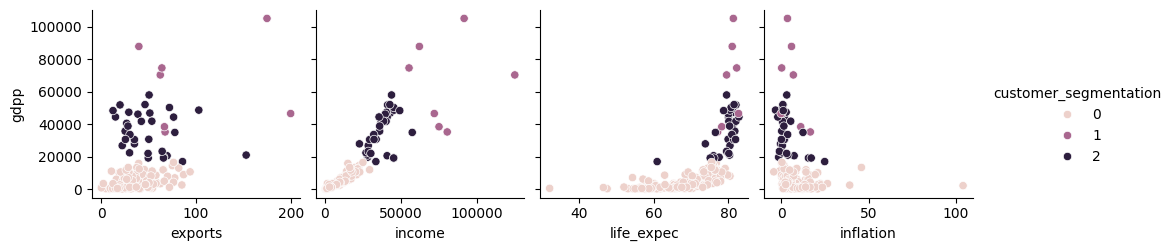

In [22]:
# Alumno: Volver a repetir el gráfico de pairplot que realizó antes
# con ['exports', 'income', 'life_expec', 'inflation']
# pero ahora utilizando para hue la columna countryseg
# Pairplot con 'hue' según la columna 'customer_segmentation'
sns.pairplot(df, y_vars=['gdpp'], x_vars=['exports', 'income', 'life_expec', 'inflation'], hue='customer_segmentation', diag_kind=None)
plt.show()


In [25]:
# Alumno: viendo los gráficos, principalmente el de ingresos (income), deteminar
# la categoría de cada cluster y colocarla en una columna countrycat.
# Utilizar lambda expresion en función de country_seg para crear
# esa nueva coulmna
# - desarrollado
# - desarrollandose
# - subdesarrollado
# Establecer los umbrales para las categorías
threshold_subdesarrollado = df['income'].quantile(0.25)
threshold_desarrollado = df['income'].quantile(0.75)

# Crear la nueva columna 'countrycat' basada en 'customer_segmentation'
df['countrycat'] = df['customer_segmentation'].apply(lambda x: 'subdesarrollado' if df.loc[df['customer_segmentation'] == x, 'income'].mean() <= threshold_subdesarrollado else ('desarrollado' if df.loc[df['customer_segmentation'] == x, 'income'].mean() >= threshold_desarrollado else 'desarrollándose'))

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,customer_segmentation,countrycat
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,desarrollándose
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,desarrollándose
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,desarrollándose
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,desarrollándose
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,desarrollándose


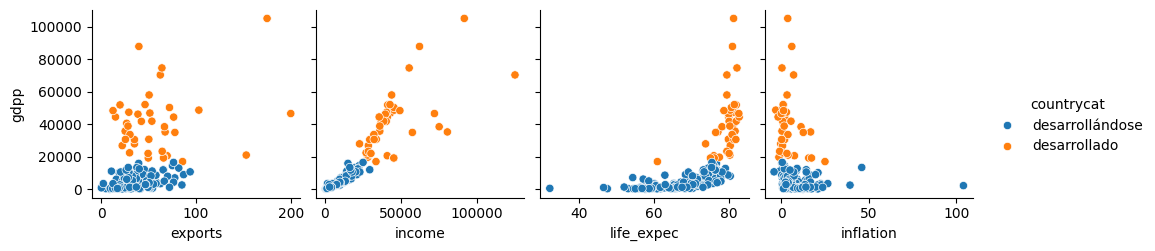

In [26]:
# Alumno: volver a graficar el gráfico anterior pero ahora usando en
# en hue = 'countrycat'
sns.pairplot(df, y_vars=['gdpp'], x_vars=['exports', 'income', 'life_expec', 'inflation'], hue='countrycat', diag_kind=None)
plt.show()

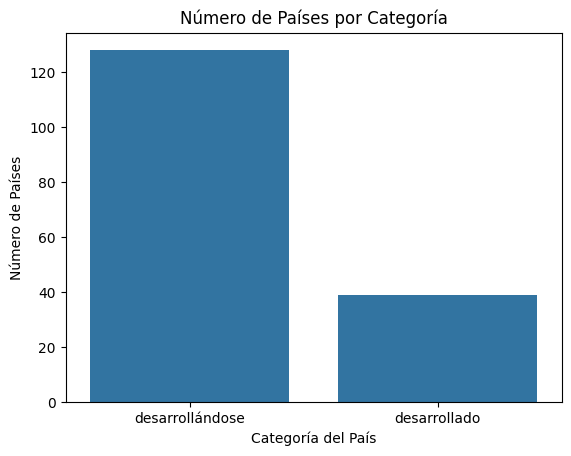

In [28]:
# Alumno: Determinar cuantas países hay en cada categoría
# utilizando el gráfico de seaborn countplot en la columna countrycat
sns.countplot(data=df, x='countrycat')
plt.xlabel('Categoría del País')
plt.ylabel('Número de Países')
plt.title('Número de Países por Categoría')
plt.show()

Bueno ahora a jugar! Ahora puede buscar en su dataset algún país en general y ver su categoría según el modelo que armó

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">